In [33]:
## Importing the needed classes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preparation

In [34]:
# Reading the data
df = pd.read_csv("Train_data.csv")
# display(df.head())
# choosing the attributes that we will build our model on, others are auxiliry variables. from the file itself we decided that
df = df.loc[:,["service","flag","src_bytes","dst_bytes","logged_in","count","srv_count",'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class']]

display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   service                      25187 non-null  object 
 1   flag                         25192 non-null  object 
 2   src_bytes                    25192 non-null  int64  
 3   dst_bytes                    25192 non-null  int64  
 4   logged_in                    25192 non-null  int64  
 5   count                        25191 non-null  float64
 6   srv_count                    25192 non-null  int64  
 7   same_srv_rate                25192 non-null  float64
 8   diff_srv_rate                25192 non-null  float64
 9   srv_diff_host_rate           25192 non-null  float64
 10  dst_host_count               25190 non-null  float64
 11  dst_host_srv_count           25192 non-null  int64  
 12  dst_host_same_srv_rate       25190 non-null  float64
 13  dst_host_diff_sr

None

In [35]:
# The describtion of the data
display(df.select_dtypes(include="object").describe())
display(df.select_dtypes(exclude="object").describe())

,service,flag,class
count,25187,25192,25192
unique,66,11,2
top,http,SF,normal
freq,8000,14973,13449


,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,2.519200e+04,2.519200e+04,25192.000000,25191.000000,25192.000000,25192.000000,25192.000000,25192.000000,25190.000000,25192.000000,25190.000000,25191.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,2.433063e+04,3.491847e+03,0.394768,84.580048,27.698754,0.660559,0.062363,0.095931,182.484875,115.063036,0.519829,0.082540,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2.410805e+06,8.883072e+04,0.488811,114.684988,72.468242,0.439637,0.178550,0.256583,99.072099,110.646850,0.448942,0.187195,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000e+00,0.000000e+00,0.000000,-166.000000,1.000000,0.000000,0.000000,0.000000,-255.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,2.000000,2.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000e+01,0.000000e+00,0.000000,14.000000,8.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.790000e+02,5.302500e+02,1.000000,144.000000,18.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,3.817091e+08,5.151385e+06,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# solving the inconsistency, after checking the data set manually
selected_col = ["count","dst_host_count"] # columns with negative inconsistency
df.loc[:,selected_col] = df.loc[:,selected_col].apply(lambda x: abs(x))
display(df)

,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,name,S0,0,0,0,166.0,9,0.05,0.0,0.0,...,9,NaN,0.05,0.00,0.00,1.00,1.0,0.00,0.00,anomaly
1,other,REJ,0,0,0,1.0,1,1.00,0.0,0.0,...,16,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.00,anomaly
2,private,REJ,0,0,0,1.0,1,1.00,0.0,0.0,...,1,0.00,0.85,1.00,0.00,0.00,0.0,0.00,0.00,anomaly
3,csnet_ns,S0,0,0,0,1.0,1,1.00,0.0,0.0,...,25,0.10,0.05,0.00,0.00,0.53,0.0,0.02,0.16,anomaly
4,other,REJ,0,0,0,1.0,12,1.00,0.0,1.0,...,53,1.00,0.00,1.00,0.51,0.00,0.0,0.00,0.00,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,eco_i,SF,8,0,0,511.0,511,1.00,1.0,0.0,...,80,0.31,0.02,0.31,0.00,0.02,0.0,0.00,0.00,anomaly
25188,ftp,SF,329,1063,1,511.0,511,1.00,1.0,0.0,...,97,0.38,0.02,0.38,0.00,0.04,0.0,0.02,0.00,normal
25189,smtp,SF,2896,333,1,511.0,511,1.00,1.0,0.0,...,190,0.75,0.15,0.75,0.00,0.00,0.0,0.00,0.00,normal
25190,http,S1,339,14600,1,511.0,511,1.00,1.0,0.0,...,102,0.40,0.02,0.40,0.00,0.02,0.0,0.02,0.00,normal


In [37]:
# filling the missing data

# display(df.isna().any())
null_columns = df.columns[df.isna().any()]
display(null_columns)

for c in null_columns:
    if df[c].dtype == "object":
        value = df[c].mode()
        value = value[0]
    else:
        if df[c].dtype == "int64":
            value = int(df[c].mean())

        else:
            value = df[c].mean()

    df[c].fillna(value,inplace=True)

# display(df)

Index(['service', 'count', 'dst_host_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate'],
      dtype='object')

In [38]:
# Removing The outliers
for col in df.select_dtypes(exclude="object"):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        # Calculating the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out rows where the values are outside the bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


display(df.info())
display(df.select_dtypes(exclude="object").describe())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3293 entries, 7 to 12955
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   service                      3293 non-null   object 
 1   flag                         3293 non-null   object 
 2   src_bytes                    3293 non-null   int64  
 3   dst_bytes                    3293 non-null   int64  
 4   logged_in                    3293 non-null   int64  
 5   count                        3293 non-null   float64
 6   srv_count                    3293 non-null   int64  
 7   same_srv_rate                3293 non-null   float64
 8   diff_srv_rate                3293 non-null   float64
 9   srv_diff_host_rate           3293 non-null   float64
 10  dst_host_count               3293 non-null   float64
 11  dst_host_srv_count           3293 non-null   int64  
 12  dst_host_same_srv_rate       3293 non-null   float64
 13  dst_host_diff_srv

None

,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,3293.000000,3293.000000,3293.0,3293.000000,3293.000000,3293.0,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.0,3293.0,3293.0,3293.0
mean,19.409657,13.341026,0.0,3.753416,4.697844,1.0,0.037282,0.067410,117.764045,200.657152,0.841124,0.011989,0.048378,0.015636,0.0,0.0,0.0,0.0
std,64.851701,40.177923,0.0,3.461372,4.191945,0.0,0.033748,0.138143,90.389292,85.233540,0.292294,0.022013,0.085376,0.018720,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.0,1.000000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.0,1.000000,1.000000,1.0,0.000000,0.000000,24.000000,152.000000,0.860000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.0,3.000000,3.000000,1.0,0.050000,0.000000,127.000000,255.000000,1.000000,0.000000,0.010000,0.010000,0.0,0.0,0.0,0.0
75%,1.000000,0.000000,0.0,5.000000,7.000000,1.0,0.060000,0.000000,197.000000,255.000000,1.000000,0.020000,0.040000,0.030000,0.0,0.0,0.0,0.0
max,641.000000,672.000000,0.0,16.000000,16.000000,1.0,0.170000,0.500000,255.000000,255.000000,1.000000,0.120000,0.400000,0.070000,0.0,0.0,0.0,0.0


In [39]:
# rechoosing the attributes after removing the outliers, as there is no benefits of original chosen attributes
df = df.loc[:,["service","flag","src_bytes","dst_bytes","count","srv_count",
       'diff_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'class']]

df.select_dtypes(exclude="object").describe()

,src_bytes,dst_bytes,count,srv_count,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000
mean,19.409657,13.341026,3.753416,4.697844,0.037282,117.764045,200.657152,0.841124,0.011989,0.048378,0.015636
std,64.851701,40.177923,3.461372,4.191945,0.033748,90.389292,85.233540,0.292294,0.022013,0.085376,0.018720
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,24.000000,152.000000,0.860000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,3.000000,0.050000,127.000000,255.000000,1.000000,0.000000,0.010000,0.010000
75%,1.000000,0.000000,5.000000,7.000000,0.060000,197.000000,255.000000,1.000000,0.020000,0.040000,0.030000
max,641.000000,672.000000,16.000000,16.000000,0.170000,255.000000,255.000000,1.000000,0.120000,0.400000,0.070000


In [40]:
display(df.info())
print("The information now is clear")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3293 entries, 7 to 12955
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   service                      3293 non-null   object 
 1   flag                         3293 non-null   object 
 2   src_bytes                    3293 non-null   int64  
 3   dst_bytes                    3293 non-null   int64  
 4   count                        3293 non-null   float64
 5   srv_count                    3293 non-null   int64  
 6   diff_srv_rate                3293 non-null   float64
 7   dst_host_count               3293 non-null   float64
 8   dst_host_srv_count           3293 non-null   int64  
 9   dst_host_same_srv_rate       3293 non-null   float64
 10  dst_host_diff_srv_rate       3293 non-null   float64
 11  dst_host_same_src_port_rate  3293 non-null   float64
 12  dst_host_srv_diff_host_rate  3293 non-null   float64
 13  class            

None

The information now is clear


# Model Planning

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


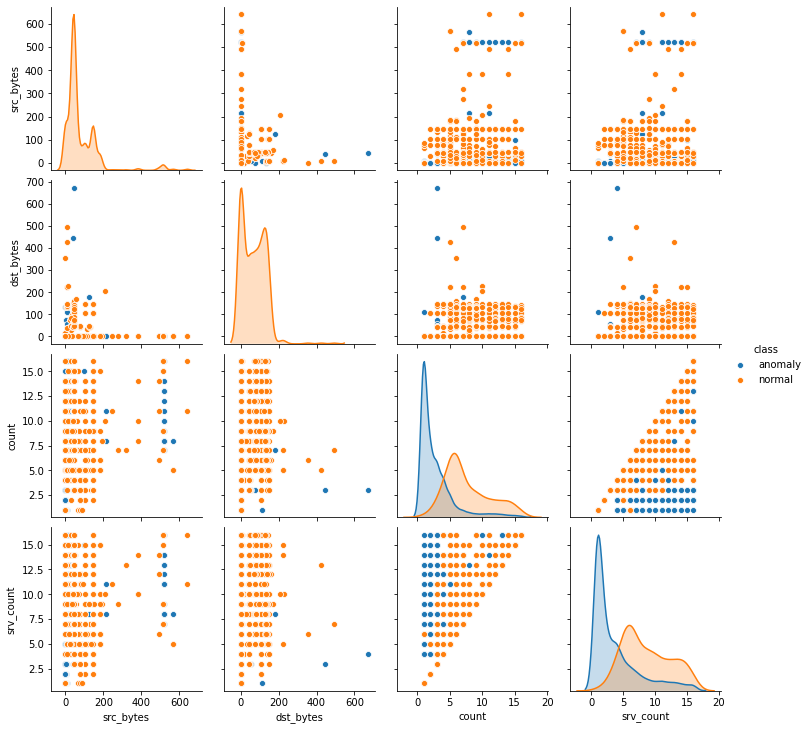

In [51]:
sns.pairplot(df, vars=['src_bytes', 'dst_bytes', 'count', 'srv_count'], hue='class')
plt.show()


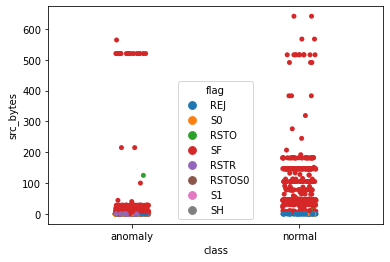

In [42]:
sns.stripplot(x='class', y='src_bytes', hue='flag', data=df, jitter=True)
plt.show()


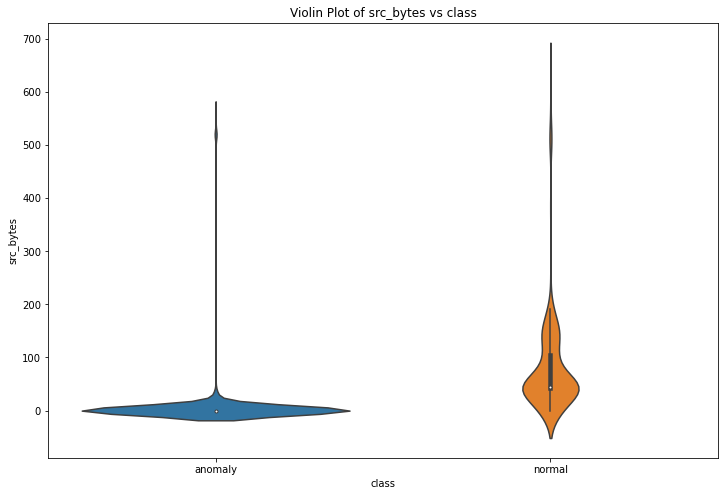

In [49]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='class', y='src_bytes', data=df)
plt.title('Violin Plot of src_bytes vs class')
plt.show()



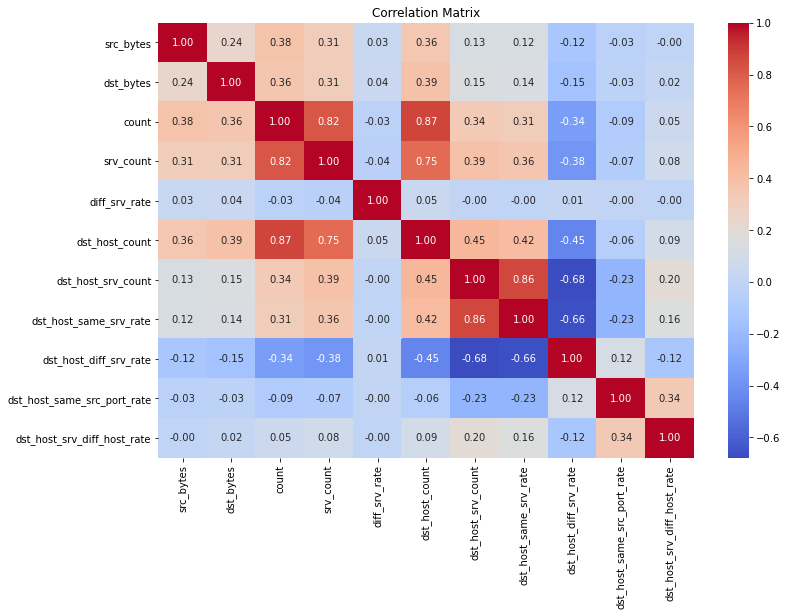

In [50]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Model Building

In [36]:
display(df)
display(df.select_dtypes(include="object").describe())


,service,flag,src_bytes,dst_bytes,count,srv_count,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
7,systat,REJ,0,0,1.0,1,0.00,1.0,133,0.39,0.04,0.01,0.02,anomaly
9,other,REJ,0,0,1.0,1,0.00,1.0,58,1.00,0.00,0.05,0.03,anomaly
14,private,S0,0,0,1.0,1,0.00,1.0,255,1.00,0.00,0.02,0.02,anomaly
16,private,REJ,0,0,1.0,1,0.00,1.0,255,1.00,0.00,0.02,0.03,anomaly
19,whois,S0,0,0,1.0,1,0.00,1.0,255,1.00,0.00,0.33,0.01,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12924,other,SF,516,4,16.0,16,0.06,255.0,255,1.00,0.00,0.00,0.00,normal
12945,http,REJ,0,0,16.0,16,0.07,255.0,255,1.00,0.00,0.06,0.05,normal
12947,domain_u,SF,43,76,16.0,16,0.07,255.0,97,0.38,0.03,0.38,0.02,normal
12952,ftp_data,RSTR,0,0,16.0,16,0.07,255.0,255,1.00,0.00,0.01,0.02,anomaly


,service,flag,class
count,3293,3293,3293
unique,62,8,2
top,private,S0,anomaly
freq,1065,1871,2658


In [35]:
# splitting the data
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)